In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

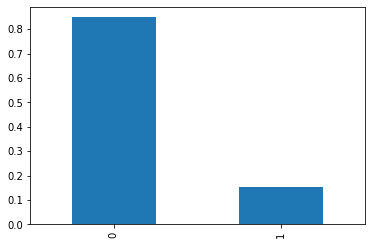

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


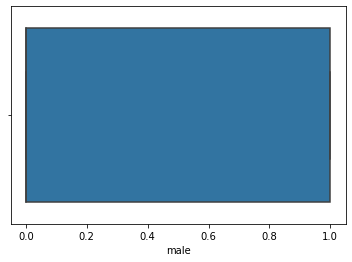

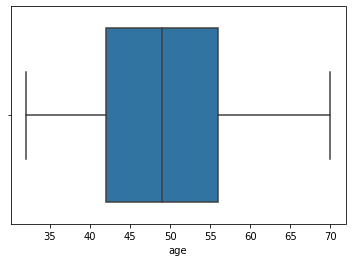

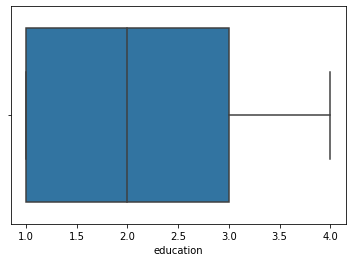

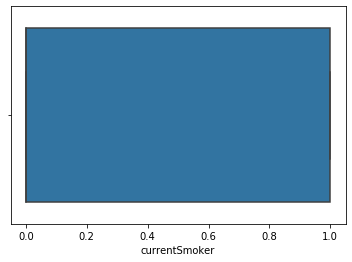

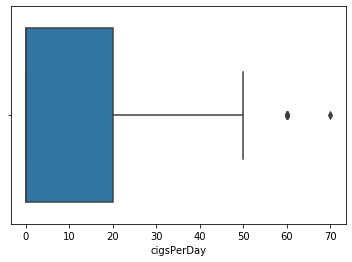

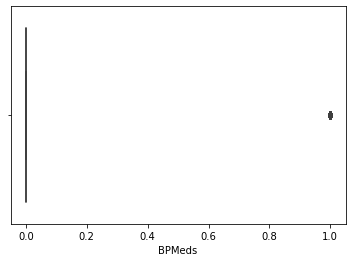

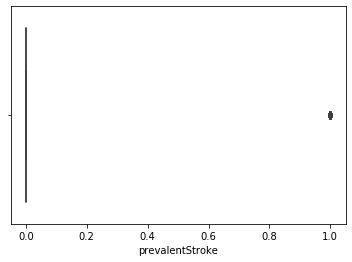

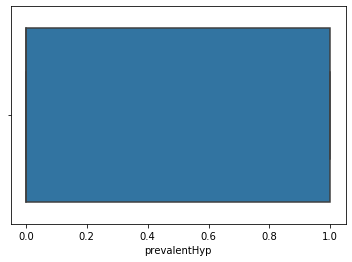

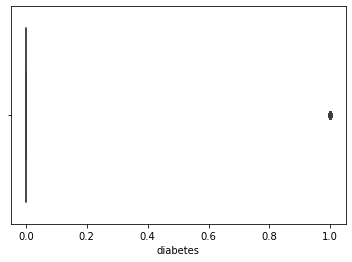

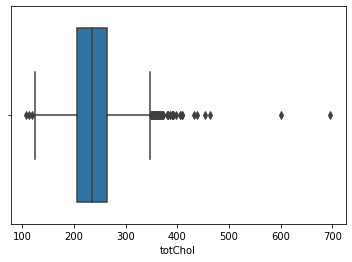

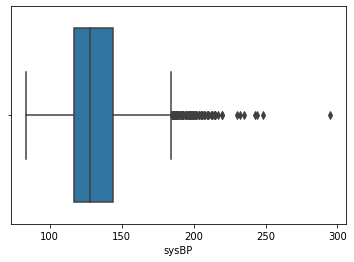

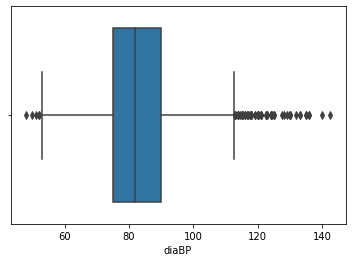

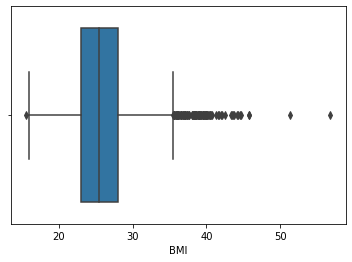

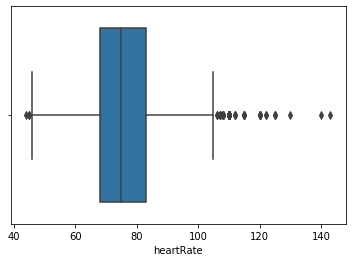

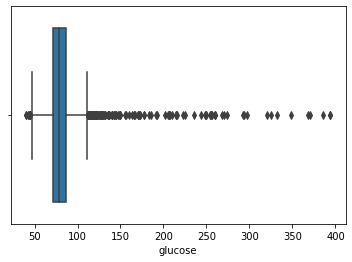

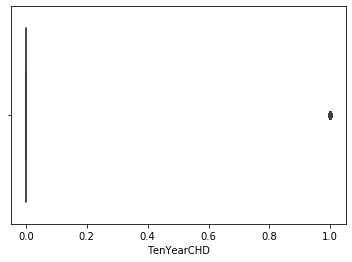

In [2]:
df =pd.read_csv(r'C:\Users\SRK\Desktop\siva_python\classification\day1\US_Heart_Patients.csv')

df.head()

df.TenYearCHD.value_counts()

df.TenYearCHD.value_counts(normalize = True)

df.TenYearCHD.value_counts(normalize = True).plot(kind = 'bar')
plt.show()

df.info()

df.isna().sum()

df.fillna(method ='ffill',inplace =True)

#cols = [i for i in df.select_dtypes!='object']
for j in df.columns:
    sns.boxplot(df[j])
    #df[j].plot(kind ='boxplot')
    plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [13]:
import plusmodules as pm
pm.corr_matrix(df)

In [16]:
y = df.TenYearCHD
x = df.drop(columns ='TenYearCHD')

In [17]:
%%time
from sklearn.model_selection import train_test_split

Wall time: 1.55 s


In [18]:
%%time

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size =0.3,random_state =1)

Wall time: 50.4 ms


In [100]:
%%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept=True,solver ='liblinear',random_state=1)
lr.fit(X_train,y_train)


Wall time: 58 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# evaluating model on train data

In [114]:
def evaluation_train_test(model,X_train,y_train,X_test,y_test):
    y_train_prob = model.predict_proba(X_train)[:,1]
    y_train_pred = model.predict(X_train)
    y_test_prob = model.predict_proba(X_test)[:,1]
    y_test_pred = model.predict(X_test)
    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report
    print('Train accuracy score of',model,':',accuracy_score(y_train,y_train_pred))
    print('Test accuracy score of ',model,':',accuracy_score(y_test,y_test_pred))
    
    print('rou_auc_score',roc_auc_score(y_train,y_train_prob))
    print('rou_auc_score',roc_auc_score(y_test,y_test_prob))
    print('Train classification report \n',classification_report(y_train,y_train_pred))
    print('Test classification report \n',classification_report(y_test,y_test_pred))

    
    fig,axes =plt.subplots(1,2,figsize =(15,5))
    sns.heatmap(confusion_matrix(y_train,y_train_pred),annot =True,fmt ='g',ax =axes[0])
    #plt.show()
    sns.heatmap(confusion_matrix(y_test,y_test_pred),annot =True,fmt ='g',ax =axes[1])
    plt.show()
    
    def roc_curves(y_true,y_true_prob):
          
          fpr, tpr, thresholds  =roc_curve(y_true,y_true_prob)
          thresholds[0] = thresholds[0]-1
          plt.plot(fpr,tpr)
          plt.plot(fpr,fpr)
          plt.plot(fpr,thresholds)
          plt.show();
    print('roc curve for Train')
    roc_curves(y_train,y_train_prob)
    print('roc curve for Test')
    roc_curves(y_test,y_test_prob)
          

Train accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) : 0.6590296495956873
Test accuracy score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) : 0.6595911949685535
rou_auc_score 0.6686971199806191
rou_auc_score 0.6898247862194731
Train classification report 
               precision    recall  f1-score   support

           0       0.90      0.67      0.77      2511
           1       0.25      0.59      0.35       4

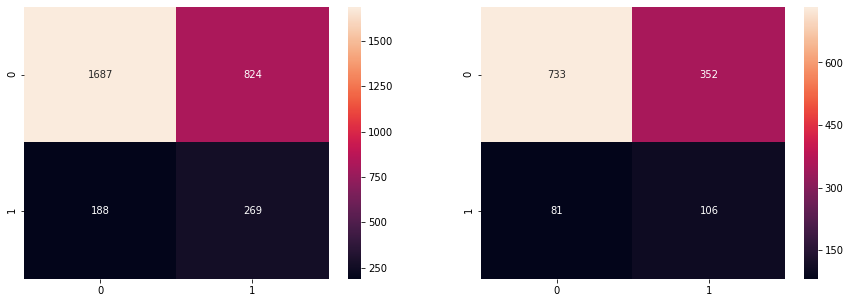

roc curve for Train


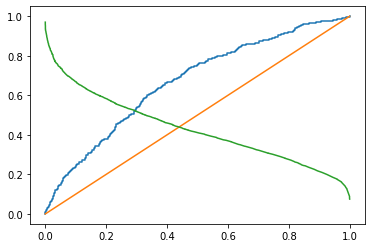

roc curve for Test


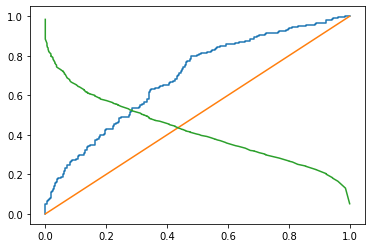

In [115]:
evaluation_train_test(lr,X_train,y_train,X_test,y_test)

## under sampling 

In [116]:
xyTrain  =pd.concat([X_train,y_train],axis =1)
xyTrain0 = xyTrain.loc[xyTrain['TenYearCHD']==0]
xyTrain1 = xyTrain.loc[xyTrain['TenYearCHD']==1]

len0 =len(xyTrain0)
len1 =len(xyTrain1)
print('len0:',len0,';  len1 :',len1)
xyTrain0_us = xyTrain0.sample(len1,random_state =1)
xyTrain_us = pd.concat([xyTrain0_us,xyTrain1],axis =0)
print(xyTrain_us['TenYearCHD'].value_counts())
y_train_undersample = xyTrain_us.TenYearCHD
x_train_undersample = xyTrain_us.drop(columns ='TenYearCHD')


len0: 2511 ;  len1 : 457
1    457
0    457
Name: TenYearCHD, dtype: int64


Train accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) : 0.6586433260393874
Test accuracy score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) : 0.6619496855345912
rou_auc_score 0.7079756187484738
rou_auc_score 0.738160132088026
Train classification report 
               precision    recall  f1-score   support

           0       0.66      0.67      0.66       457
           1       0.66      0.65      0.65       45

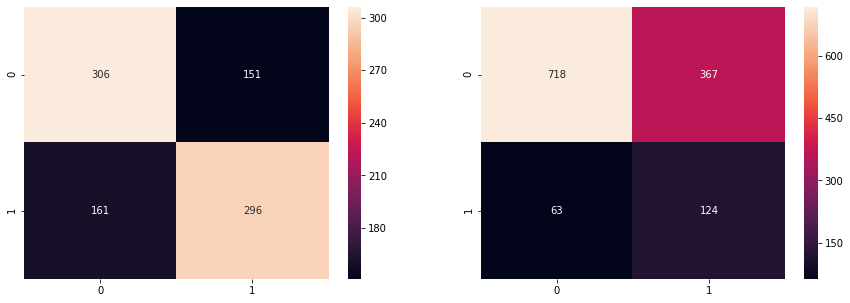

roc curve for Train


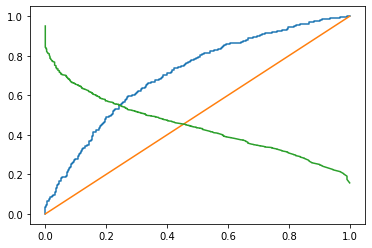

roc curve for Test


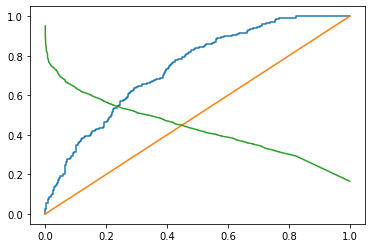

In [117]:
lr.fit(x_train_undersample,y_train_undersample)

evaluation_train_test(lr,x_train_undersample,y_train_undersample,X_test,y_test)

## oversampling

In [118]:
xyTrain  =pd.concat([X_train,y_train],axis =1)
xyTrain0 = xyTrain.loc[xyTrain['TenYearCHD']==0]
xyTrain1 = xyTrain.loc[xyTrain['TenYearCHD']==1]
len0 =len(xyTrain0)
len1 =len(xyTrain1)
print('len0:',len0,';  len1 :',len1)
xyTrain1_us = xyTrain1.sample(len0,replace =True,random_state =1)
xyTrain_us = pd.concat([xyTrain1_us,xyTrain0],axis =0)
print(xyTrain_us['TenYearCHD'].value_counts())
y_train_oversample = xyTrain_us.TenYearCHD
x_train_overrsample = xyTrain_us.drop(columns ='TenYearCHD')

len0: 2511 ;  len1 : 457
1    2511
0    2511
Name: TenYearCHD, dtype: int64


Train accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) : 0.6678614097968937
Test accuracy score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) : 0.6737421383647799
rou_auc_score 0.7227883493433352
rou_auc_score 0.7534537568693166
Train classification report 
               precision    recall  f1-score   support

           0       0.67      0.66      0.67      2511
           1       0.67      0.67      0.67      25

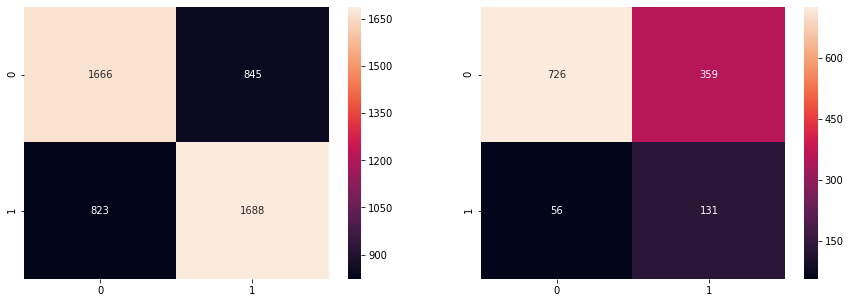

roc curve for Train


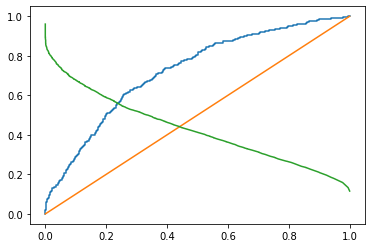

roc curve for Test


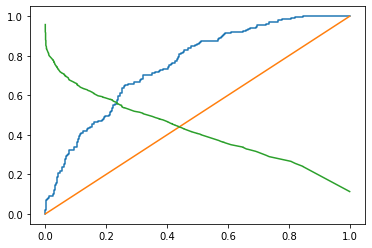

In [119]:
lr.fit(x_train_overrsample,y_train_oversample)

evaluation_train_test(lr,x_train_overrsample,y_train_oversample,X_test,y_test)

# SMOTE for oversampling minority class

In [120]:
from imblearn.over_sampling import SMOTE

In [121]:
smote = SMOTE(sampling_strategy='minority',random_state=1)
X_trainsmo,y_trainsmo =smote.fit_sample(X_train,y_train)
print(len(y_trainsmo[y_trainsmo==0]))
print(len(y_trainsmo[y_trainsmo==1]))

2511
2511


Train accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) : 0.6680605336519315
Test accuracy score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) : 0.6595911949685535
rou_auc_score 0.7257170798149631
rou_auc_score 0.6898247862194731
Train classification report 
               precision    recall  f1-score   support

           0       0.67      0.67      0.67      2511
           1       0.67      0.66      0.67      25

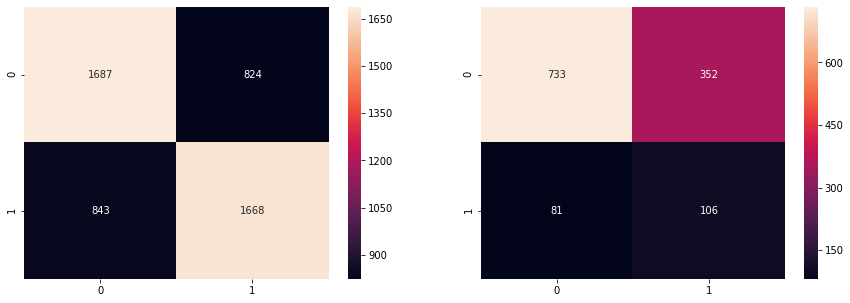

roc curve for Train


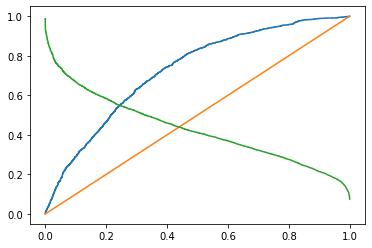

roc curve for Test


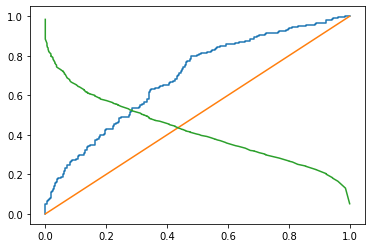

In [122]:
lr.fit(X_trainsmo,y_trainsmo)

evaluation_train_test(lr,X_trainsmo,y_trainsmo,X_test,y_test)

In [123]:
from sklearn.ensemble import RandomForestClassifier

rf =RandomForestClassifier()

Train accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) : 1.0
Test accuracy score of  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf

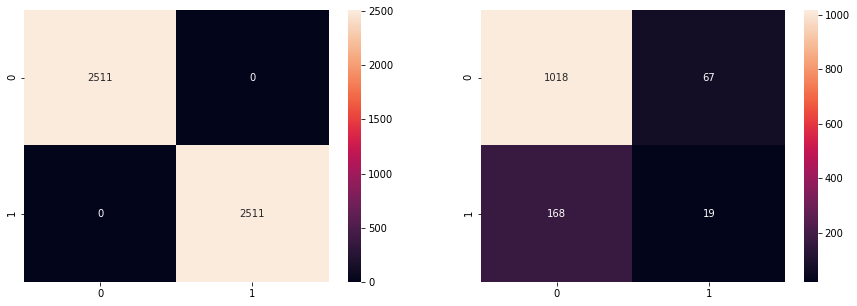

roc curve for Train


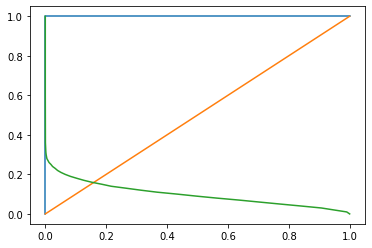

roc curve for Test


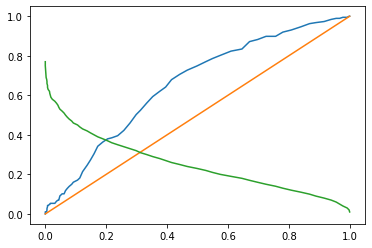

In [124]:
rf.fit(X_trainsmo,y_trainsmo)

evaluation_train_test(rf,X_trainsmo,y_trainsmo,X_test,y_test)